## Explore Results

#### Load results

In [1]:
import pandas as pd
import json
import os

tasks = [
    'adding_problem',
    'bracket_matching',
    'chaotic_forecasting',
    'continue_pattern_completion',
    'continue_postcasting',
    'copy_task',
    'discrete_pattern_completion',
    'discrete_postcasting',
    'mnist_classification',
    'selective_copy_task',
    'sin_forecasting',
    'sorting_problem',
]

tasks_names = {
    'adding_problem': 'Adding Problem',
    'bracket_matching': 'Bracket Matching',
    'chaotic_forecasting': 'Chaotic Forecasting',
    'continue_pattern_completion': 'Continuous Pattern Completion',
    'continue_postcasting': 'Continuous Postcasting', # Recall
    'copy_task': 'Simple Copy',
    'discrete_pattern_completion': 'Discrete Pattern Completion',
    'discrete_postcasting': 'Discrete Postcasting', # Recall
    'mnist_classification': 'Sequential MNIST',
    'selective_copy_task': 'Selective Copy',
    'sin_forecasting': 'Sinus Forecasting',
    'sorting_problem': 'Sorting Problem',
}

sizes = ['1k', '10k', '100k', '1M']

df = pd.DataFrame()
for size in sizes:
    # Select experiment to load
    folders = [f'{task}_sm_{size}' for task in tasks]

    data = []
    for folder in folders:
        filename = 'exp-results/' + folder + '/results.txt'
        with open(filename, 'r') as f:
            exec("entries = " + f.read().replace('NaN', 'None').replace('\n', ','))
            data.extend(entries)
    # df = pd.DataFrame(data)
    df_size = pd.DataFrame(data)
    df_size['size'] = size
    df_size['task_size'] = df_size.task.apply(lambda x: tasks_names[x] + '-' + str(sizes.index(size)))
    df = pd.concat([df, df_size], ignore_index=True)

# Highlight the lowest value in each row by making it bold
def highlight_min(data):
    return data.apply(lambda x: f"\\textbf{{{x:.3f}}}" if x == data.min() else f"{x:.3f}")

def replace(v):
    if '0' in v:
        return v.replace('0', '1k')
    elif '1' in v:
        return v.replace('1', '10k')
    elif '2' in v:
        return v.replace('2', '100k')
    elif '3' in v:
        return v.replace('3', '1M')

baseline = df.pivot_table(index='task_size', columns='model', values='score', aggfunc='min')
baseline.index = [replace(x) for x in baseline.index]
baseline = baseline.apply(highlight_min, axis=1)
print(baseline.to_latex(escape=False, float_format="%.3f", label=f"tab:results_{size}", caption=f"Results for size {size}"))
print('\n\n')

df

\begin{table}
\caption{Results for size 1M}
\label{tab:results_1M}
\begin{tabular}{lllll}
\toprule
model & EST & GRU & LSTM & Transformer \\
\midrule
Adding Problem-1k & 0.120 & 0.170 & 0.480 & \textbf{0.000} \\
Adding Problem-10k & 0.330 & 0.160 & 0.280 & \textbf{0.000} \\
Adding Problem-100k & 0.360 & 0.320 & 0.300 & \textbf{0.000} \\
Adding Problem-1M & 0.440 & 0.440 & 0.420 & \textbf{0.000} \\
Bracket Matching-1k & \textbf{0.090} & 0.220 & 0.180 & 0.230 \\
Bracket Matching-10k & \textbf{0.090} & 0.230 & 0.280 & 0.270 \\
Bracket Matching-100k & \textbf{0.230} & 0.290 & 0.370 & 0.380 \\
Bracket Matching-1M & 0.320 & 0.340 & 0.360 & \textbf{0.290} \\
Chaotic Forecasting-1k & 0.036 & 0.027 & 0.030 & \textbf{0.010} \\
Chaotic Forecasting-10k & 0.042 & 0.028 & 0.033 & \textbf{0.006} \\
Chaotic Forecasting-100k & 0.045 & 0.026 & 0.031 & \textbf{0.007} \\
Chaotic Forecasting-1M & 0.048 & 0.020 & 0.026 & \textbf{0.003} \\
Continuous Pattern Completion-1k & \textbf{0.064} & 0.082 & 0.079 & 0

,task,model,model_params,seed,learning_rate,weight_decay,score,time,size,task_size
0,adding_problem,Transformer,transformer-decoder-1k-ff-hlow,0,0.0100,0.01,0.650,49.948585,1k,Adding Problem-0
1,adding_problem,Transformer,transformer-decoder-1k-ff-hbig,0,0.0100,0.01,0.680,4.671077,1k,Adding Problem-0
2,adding_problem,Transformer,transformer-decoder-1k-same-hlow,0,0.0100,0.01,0.650,2.763265,1k,Adding Problem-0
3,adding_problem,Transformer,transformer-decoder-1k-same-hbig,0,0.0100,0.01,0.670,3.890573,1k,Adding Problem-0
4,adding_problem,LSTM,lstm-1k,0,0.0100,0.01,0.740,1.773769,1k,Adding Problem-0
...,...,...,...,...,...,...,...,...,...,...
11541,sorting_problem,GRU,lstm-1M,4,0.0001,0.01,0.691,10.179924,1M,Sorting Problem-3
11542,sorting_problem,EST,est-1M-dim,4,0.0001,0.01,0.612,68.639676,1M,Sorting Problem-3
11543,sorting_problem,EST,est-1M-units,4,0.0001,0.01,0.630,126.984745,1M,Sorting Problem-3
11544,sorting_problem,EST,est-1M-same-rlow,4,0.0001,0.01,0.587,62.490519,1M,Sorting Problem-3


### Best unique result whatever size

In [2]:
index = df.groupby(['task', 'model'])['score'].idxmin()
df_best = df.loc[index]
df_best['value'] = df_best['score'].round(3).astype(str) + ' / ' + df_best['size'].astype(str)

def highlight_min(data):
    return data.apply(lambda x: f"\\textbf{{{x}}}" if x == data.min() else f"{x}")

pivot = df_best.pivot_table(index='task', columns='model', values='value', aggfunc='min')
pivot.index = [tasks_names[x] for x in pivot.index]
pivot = pivot.apply(highlight_min, axis=1)
print(pivot.to_latex(escape=False, float_format="%.3f", label=f"tab:best_res", caption=f"Best results / corresponding size for each task and model"))
print('\n\n')

\begin{table}
\caption{Best results / corresponding size for each task and model}
\label{tab:best_res}
\begin{tabular}{lllll}
\toprule
model & EST & GRU & LSTM & Transformer \\
\midrule
Adding Problem & 0.12 / 1k & 0.16 / 10k & 0.28 / 10k & \textbf{0.0 / 1k} \\
Bracket Matching & \textbf{0.09 / 1k} & 0.22 / 1k & 0.18 / 1k & 0.23 / 1k \\
Chaotic Forecasting & 0.036 / 1k & 0.02 / 1M & 0.026 / 1M & \textbf{0.003 / 1M} \\
Continuous Pattern Completion & \textbf{0.064 / 1k} & 0.081 / 100k & 0.079 / 10k & 0.071 / 1M \\
Continuous Postcasting & \textbf{0.002 / 1k} & 0.019 / 1k & 0.167 / 1k & 0.199 / 1M \\
Simple Copy & \textbf{0.51 / 1k} & 0.654 / 1k & 0.654 / 10k & 0.542 / 100k \\
Discrete Pattern Completion & \textbf{0.094 / 10k} & 0.428 / 1M & 0.415 / 1M & 0.402 / 10k \\
Discrete Postcasting & 0.0 / 1k & \textbf{0.0 / 10k} & 0.122 / 10k & 0.552 / 10k \\
Sequential MNIST & 0.49 / 10k & 0.31 / 100k & 0.31 / 10k & \textbf{0.24 / 1k} \\
Selective Copy & \textbf{0.28 / 1k} & 0.642 / 1k & 0.642 

### Violin of the best configuration (5 seeds)

/Users/naowak/Thesis/code/Echo-State-Transformer/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


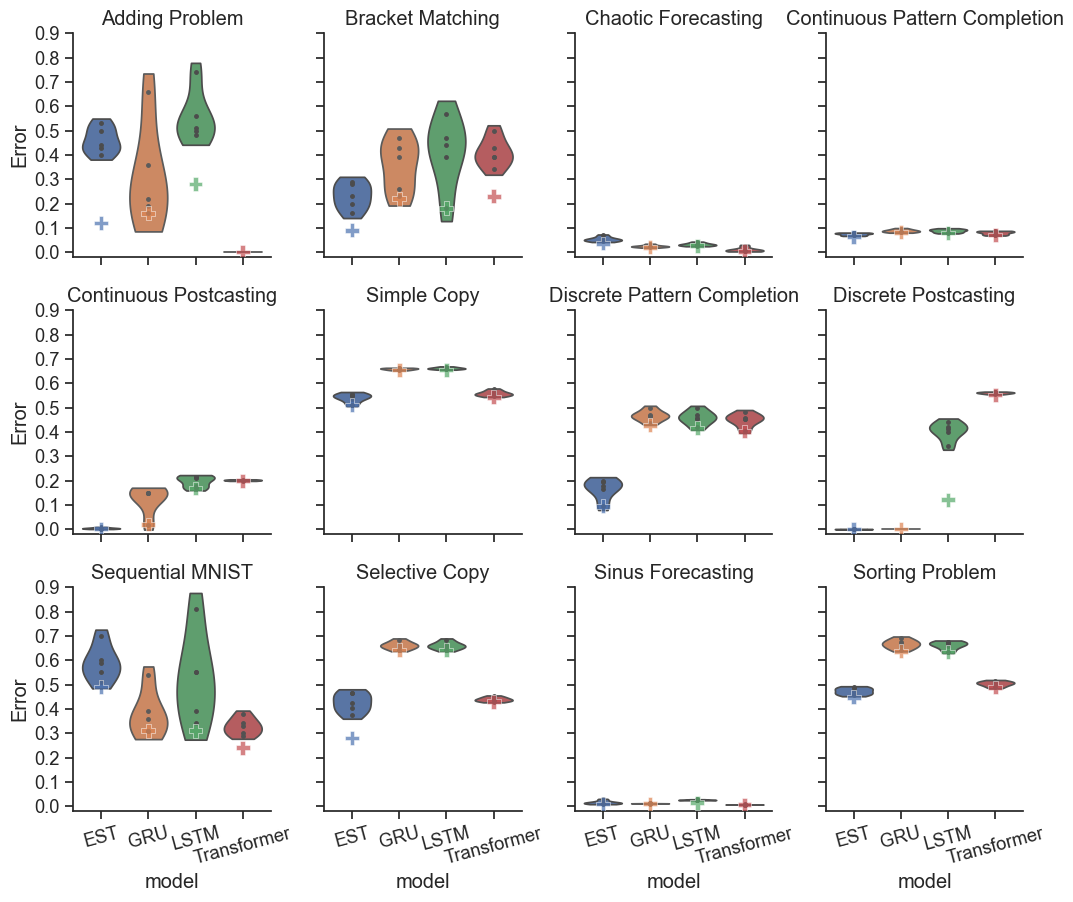

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="ticks", font_scale=1.2)

tmp = df.groupby(['task', 'model', 'model_params', 'learning_rate']).agg({'score': 'mean'}).groupby(['task', 'model'])['score'].idxmin()

seed_df = pd.DataFrame()

for (task, model, config, lr) in tmp :
    # print(f"{task} - {model} - {config} - {lr}")
    lines = df[(df['task'] == task) & (df['model'] == model) & (df['model_params'] == config) & (df['learning_rate'] == lr)]
    seed_df = pd.concat([seed_df, lines], ignore_index=True)

seed_df['col'] = seed_df['task'].apply(lambda x: list(tasks_names.keys()).index(x) % 4)
seed_df['row'] = seed_df['task'].apply(lambda x: list(tasks_names.keys()).index(x) // 4)
df_best['col'] = df_best['task'].apply(lambda x: list(tasks_names.keys()).index(x) % 4)
df_best['row'] = df_best['task'].apply(lambda x: list(tasks_names.keys()).index(x) // 4)

g = sns.FacetGrid(seed_df, col='col', row='row', hue='model', height=3, aspect=0.9)
g.map(sns.violinplot, 'model', 'score', density_norm="count", inner='point', cut=0.5)

g.set_axis_labels(None, "Error")
g.set(ylim=(-0.02, 0.9))
g.axes.flat[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
for i, m in enumerate(tasks_names.values()):
    g.axes.flat[i].set_title(m)
    g.axes.flat[i].tick_params(axis='x', rotation=15)  # Rotate xticks
    g.axes.flat[i].set_xlabel('')  # Remove x-axis label

    # Add scatterplot only if better score is found
    best_df = df_best[(df_best['row'] == i // 4) & (df_best['col'] == i % 4)]
    sns.scatterplot(data=best_df, x='model', y='score', hue='model', s=100, zorder=10, alpha=0.7, ax=g.axes.flat[i], legend=False, marker='P', linewidth=0.5)


### Best mean whatever size

In [6]:
import seaborn as sns

# group by task, model, model_params, size, learning_rate and get the mean score
# and then group by task, model, size and get the min score
df_bar = df.groupby(['task', 'model', 'model_params', 'size', 'learning_rate']).agg({'score': 'mean'}).reset_index()
df_bar = df_bar.groupby(['task', 'model', 'size']).agg({'score': 'min'}).reset_index()

# Réordonner les valeurs de la colonne 'size'
df_bar['size'] = pd.Categorical(df_bar['size'], categories=['1k', '10k', '100k', '1M'], ordered=True)

# Get the mean score for each task and model
mean_df = pd.DataFrame()
for size in ['1k', '10k', '100k', '1M']:
    df_size = df_bar[df_bar['size'] == size]
    mean_df = pd.concat([mean_df, df_size], ignore_index=True)
    
# Highlight the lowest value in each row by making it bold
pivot = mean_df.pivot_table(index='task', columns='model', values='score', aggfunc='min')
pivot.index = [tasks_names[x] for x in pivot.index]
pivot = pivot.apply(highlight_min, axis=1)
print(pivot.to_latex(escape=False, float_format="%.3f", label=f"tab:best_mean_result", caption=f"Best mean results for each task and model"))
print('\n\n')

\begin{table}
\caption{Best mean results for each task and model}
\label{tab:best_mean_result}
\begin{tabular}{lllll}
\toprule
model & EST & GRU & LSTM & Transformer \\
\midrule
Adding Problem & 0.45999999999999996 & 0.31799999999999995 & 0.558 & \textbf{0.0} \\
Bracket Matching & \textbf{0.23200000000000004} & 0.356 & 0.41 & 0.41 \\
Chaotic Forecasting & 0.05372282937018106 & 0.025034315366215865 & 0.03197283420607691 & \textbf{0.01062288161988067} \\
Continuous Pattern Completion & \textbf{0.07431398750960624} & 0.08810603912734581 & 0.08794932116531345 & 0.07960836755965253 \\
Continuous Postcasting & \textbf{0.0045972669512697965} & 0.12239152487168825 & 0.19643357143656542 & 0.20165637308793194 \\
Simple Copy & \textbf{0.5405454545454546} & 0.6590909090909091 & 0.6619090909090909 & 0.5583636363636364 \\
Discrete Pattern Completion & \textbf{0.1663333333333333} & 0.4668333333333333 & 0.4585 & 0.4496666666666667 \\
Discrete Postcasting & 8.888888888889391e-05 & \textbf{0.0} & 0.4029

### Display best error per size & per model

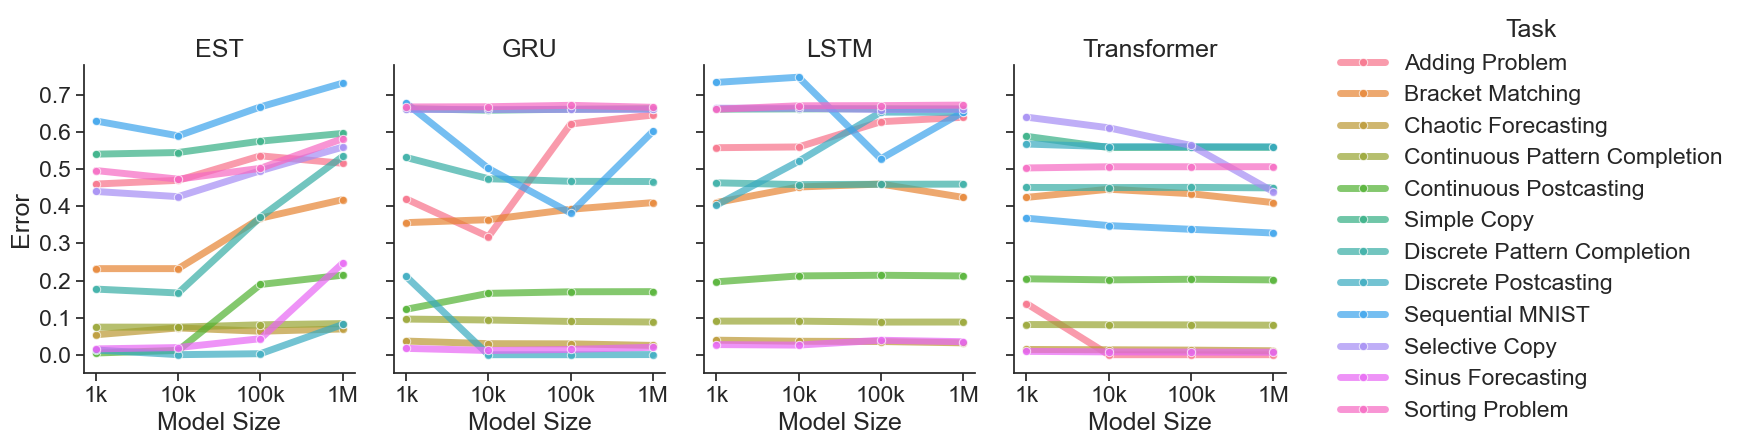

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, style="ticks")

best_df = mean_df
best_df['tasks'] = best_df['task'].apply(lambda x: tasks_names[x])

g = sns.FacetGrid(best_df, col='model', hue='tasks', height=4.5, aspect=0.75)
g.map(sns.lineplot, 'size', 'score', marker='o', alpha=0.7, linewidth=5)
g.add_legend(title='Task', bbox_to_anchor=(0.78, 1.03), loc='upper left')
g.set_axis_labels("Model Size", "Error")
g.set(ylim=(-0.05, 0.78))
g.axes.flat[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
for i, m in enumerate(['EST', 'GRU', 'LSTM', 'Transformer']):
    g.axes.flat[i].set_title(m)
# plt.savefig(f"../images/mean-scores-evolution.pdf", format="pdf", bbox_inches="tight")

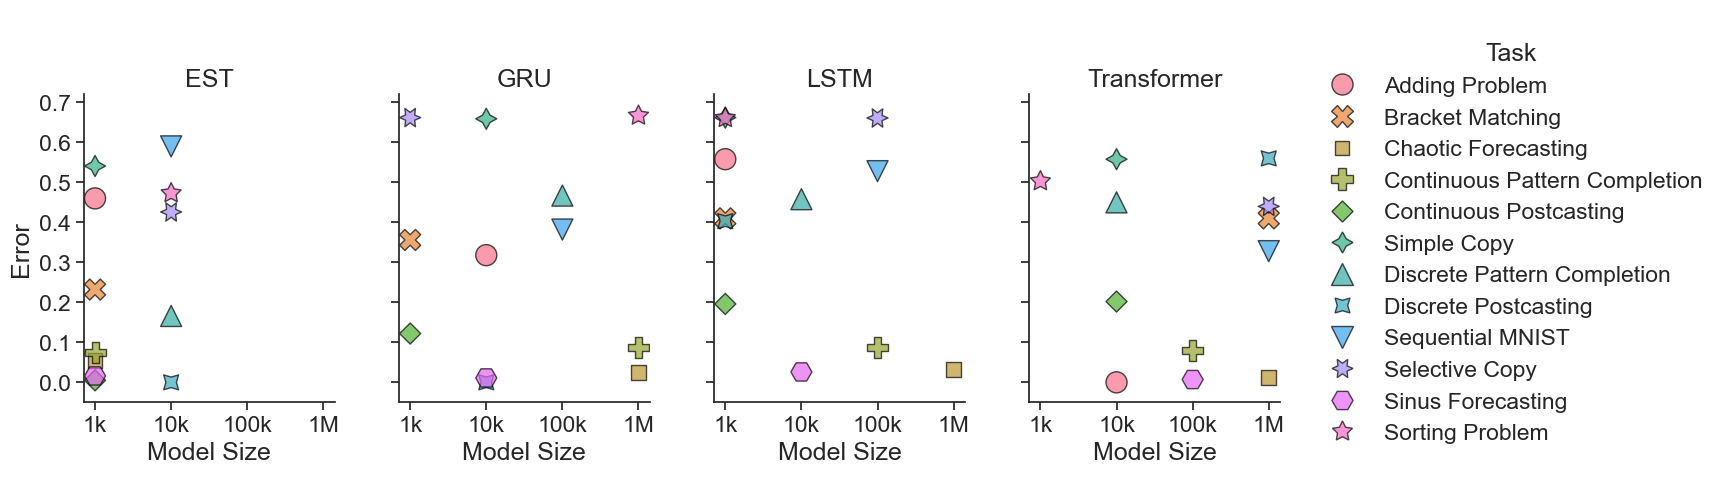

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Réordonner les valeurs de la colonne 'size'
mean_df['size'] = pd.Categorical(mean_df['size'], categories=['1k', '10k', '100k', '1M'], ordered=True)
best_df = mean_df
best_df['score'] = best_df['score'].astype(float).round(3)
best_df = mean_df.loc[mean_df.groupby(['task', 'model'])['score'].idxmin()].reset_index(drop=True)
best_df['tasks'] = best_df['task'].apply(lambda x: tasks_names[x])

sns.set(font_scale=1.5, style="ticks")
# sns.set()

g = sns.relplot(
    data=best_df,
    x="size", y="score", col="model", hue="tasks", style="tasks",
    kind="scatter", height=4.5, aspect=0.53, alpha=0.7, s=230, edgecolor="black", linewidth=1,
)
g._legend.set_title("Task")
g.add_legend(bbox_to_anchor=(1.3, 1.05))
g.set_axis_labels("Model Size", "Error")
g.set(ylim=(-0.05, 0.72))
g.axes.flat[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
for i, m in enumerate(['EST', 'GRU', 'LSTM', 'Transformer']):
    g.axes.flat[i].set_title(m)
# plt.savefig(f"../images/best-mean-scores-size.pdf", format="pdf", bbox_inches="tight")